# Análisis de los 25 retailers más grandes de Estados Unidos

![Imagen por Theresa Chiechi © The Balance 2019](./Images/image-20220224-224243.png)

Walmart, Costco, Kroger, son las empresas más grandes del mundo con los mejores Ingresos Anuales. Este dato se ha generado constantemente en los ultimos años en base al reporte de ***Global Powers of Retailing report***, publicado cada año por parte de Deloitte Touche Tohmatsu y la Revista STORES .

En este Informe vamos a realizar un analisis en base a los 25 Retails mas grandes de Estados Unidos del año 2015 para contrastar la información

In [ ]:
# Importar librerías aquí
import warnings
import matplotlib.ticker as ticker
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
palette=sns.color_palette("tab10")


In [ ]:
##funcion para generar una paleta de colores uniforme y un resaltador en base al "tab10" seaborn
def make_color_palette(categories,labels,palette,marker=palette[3]):
    color_dic={}
    for i,cat in enumerate(labels) :
        if cat in categories:
            color_dic[cat]=marker
        else:
            color_dic[cat]=palette[7]
    return color_dic

In [ ]:
df=pd.read_csv("/work/Data/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv")

In [ ]:
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


3 columnas tienen 2 datos faltantes por cada una, se va a considerar estos celdas sin registro como cero

In [ ]:
df[['Stores','Sales/Avg. Store','Store Count Growth']]=df[['Stores','Sales/Avg. Store','Store Count Growth']].fillna(0)

In [ ]:
print('Categorias')
print(df['Category'].value_counts())
print(f'Numero de Retails sin categoria: {sum(df["Category"].isnull())}')

Categorias
Grocery                  7
Drug Stores              3
Supercenters             3
Home Improvement         2
Dollar Stores            2
Department Stores        2
Apparel                  1
Warehouse Club           1
Warehouse Clubs          1
Electronic/Mail Order    1
Electronics              1
Name: Category, dtype: int64
Numero de Retails sin categoria: 1


- Se va a relizar correcciones a las categorias duplicadas
- Se añade una nueva categoria Electronic Comerce para los Retails que no poseen Tiendas Fisicas

In [ ]:
df[df['Stores']==0]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,0.0,0.0,0.0,Electronic/Mail Order
11,Apple incl. Online,37664,0.0,0.0,0.0,NaN


In [ ]:
df['Category']=df['Category'].replace('Warehouse Clubs','Warehouse Club')
df['Category'].iloc[6]='Electronic Comerce'
df['Category'].iloc[11]='Electronic Comerce'

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

#### ¿Cuál es la compañia dominate en ventas?
Primero se debe responder esta pregunta, ya sabiamos con antelacion por el ejemplo del reto, que era Walmart, pero tenemos que comprobarlo

In [ ]:
df.sort_values('Sales',ascending=False)[['Company','Sales']].iloc[0]

Company    Walmart US
Sales          658119
Name: 0, dtype: object

**Walmart tiene el mayor numero de ventas con 658119 millones de dolares**. Esta diferencia es muy notable respecto a las otras compañias.

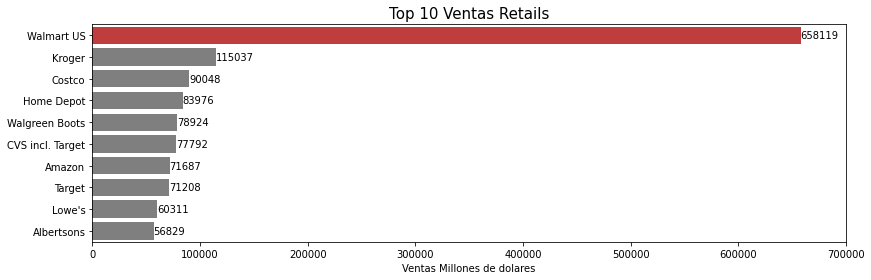

In [ ]:
top_sales_labels=df.sort_values('Sales',ascending=False)['Company']
top_sales_data=df.sort_values('Sales',ascending=False)['Sales']
fig,axes=plt.subplots(figsize=(13.5,4)); 
colors=make_color_palette('Walmart US',top_sales_labels,palette)
sns.barplot(top_sales_data[0:10],top_sales_labels[0:10], palette=colors)
axes.set_title("Top 10 Ventas Retails",size=15)
axes.set_xlabel('Ventas Millones de dolares')
axes.set(ylabel=None)
axes.bar_label(axes.containers[0])
axes.set_xlim([0,700000])
fig.show()

#### Puntos a considerar
- La diferencia entre Walmart y su principal competidor es de 543082 millones de dolares
- Walmart domina totalmente el mercado de Retails

#### Ventas de los Retails Omitiendo Walmart

In [ ]:
df_without_walmart=df[df['Company']!='Walmart US']

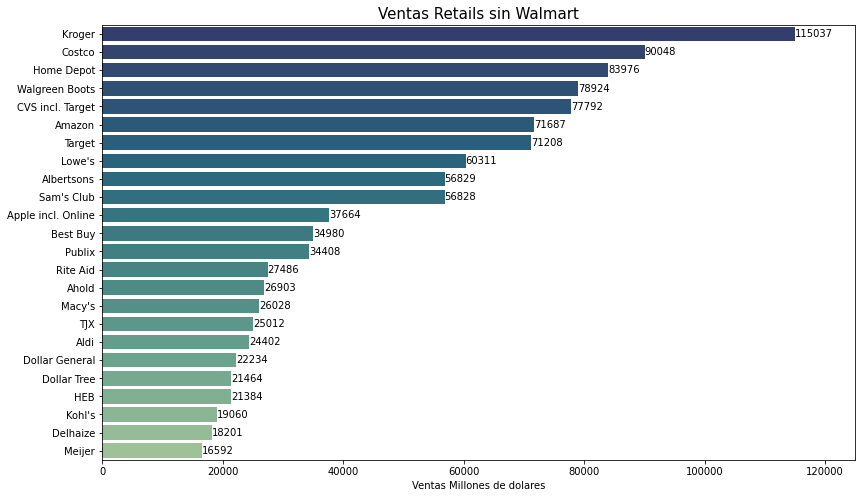

In [ ]:

sales_labels_without_walmart=df_without_walmart.sort_values('Sales',ascending=False)['Company']
sales_data_without_walmart=df_without_walmart.sort_values('Sales',ascending=False)['Sales']
fig,axes=plt.subplots(figsize=(13.5,8)); 
sns.barplot(sales_data_without_walmart,sales_labels_without_walmart, palette='crest_r')
axes.set_title("Ventas Retails sin Walmart",size=15)
axes.set_xlabel('Ventas Millones de dolares'); axes.set(ylabel=None); axes.set_xlim([0,125000])
axes.bar_label(axes.containers[0])
fig.show()

Por ultimo, calculamos el promedio de Ventas sin considerar a walmart

In [ ]:
mean_sales_ww=np.mean(sales_data_without_walmart).round(2)
print(mean_sales_ww)

46602.42


#### Conclusión
> Las compañias venden en promedio **46602.42** millones de dolares omitiendo a Walmart

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Descartaremos a Walmart para tener un IQR más enfocado a la mayoria de Retails

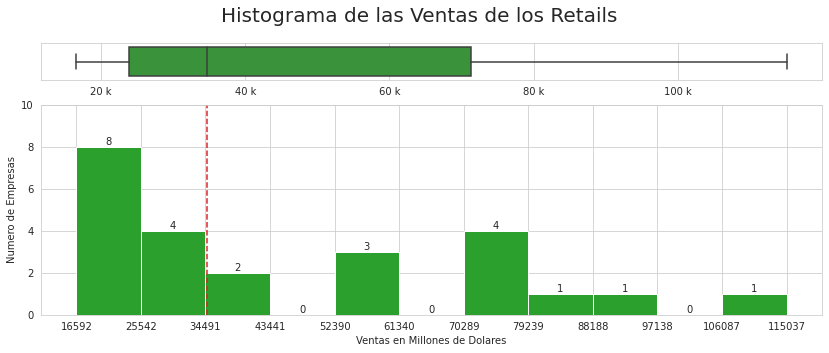

In [ ]:
fig,axes=plt.subplots(2,1, figsize=(14,5),gridspec_kw={"height_ratios": (.15, .85)}); 
sns.set_style("whitegrid")
sns.boxplot(df_without_walmart['Sales'], ax=axes[0],color=palette[2])
axes[0].set(xlabel=None); axes[0].xaxis.set_major_formatter(ticker.EngFormatter())
count, aux_bins=np.histogram(df_without_walmart['Sales'],bins=11)
sns.set_style("whitegrid")
sns.histplot(df_without_walmart,x='Sales', ax=axes[1], color=palette[2],bins=aux_bins,alpha=1)
axes[1].set(xticks=aux_bins); axes[1].set_ylim([0,10])
axes[1].set_xlabel('Ventas en Millones de Dolares'); axes[1].set_ylabel('Numero de Empresas')
fig.suptitle('Histograma de las Ventas de los Retails',size=20)
axes[1].bar_label(axes[1].containers[0])
axes[1].axvline(np.median(df_without_walmart['Sales']), ls='--',color=palette[3])
fig.show()


Nota: La grafica no considera a Walmart
#### Puntos a Considerar
> - 12 Retails generaron ventas entre los 16000 a 34500 millones de dolares
> - 4 Retails generaron ventas entre los 70000 a 79000 millones de dolares
> - Son pocos Retails que superan los 80000 millones de dolares
#### Conclusión
> 14 de los 25 Retails, es decir la mayoria, generaron sus ventas en el rango de 16000 a 39000 millones de dolares


### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

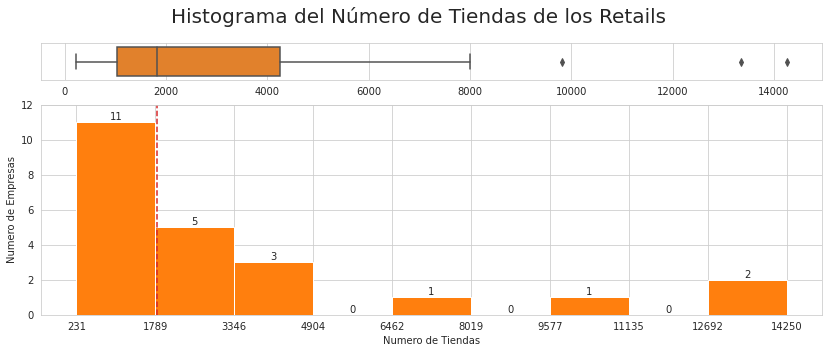

In [ ]:
df_no_online_stores=df[df['Stores']>0].reset_index()
fig,axes=plt.subplots(2,1, figsize=(14,5),gridspec_kw={"height_ratios": (.15, .85)}); 
sns.boxplot(df_no_online_stores['Stores'], ax=axes[0],color=palette[1])
axes[0].set(xlabel=None);
counts, aux_bins=np.histogram(df_no_online_stores['Stores'],bins=9)
sns.histplot(df_no_online_stores,x='Stores', ax=axes[1],bins=aux_bins,color=palette[1],alpha=1)
axes[1].set(xticks=aux_bins); axes[1].set_ylim([0,12])
axes[1].set_xlabel('Numero de Tiendas')
fig.suptitle("Histograma del Número de Tiendas de los Retails",size=20)
axes[1].set_ylabel('Numero de Empresas'); axes[1].bar_label(axes[1].containers[0])
axes[1].axvline(np.median(df_no_online_stores['Stores']), ls='--',color=palette[3])
fig.show()

Nota: El grafico no considera a Tiendas Online como Amazon o Apple Online
#### Puntos a considerar

> - 11 de los 25 Retails tienen de 231 a 1788 tiendas físicas
> - 8 de los 25 Retails tienen de 1789 a 4903 tiendas fisicas
> - 2 Retails NO poseen tiendas Fisicas 
> - 4 Retails poseen más de 6000 tiendas fisicas

#### Conclusion:
> 19 de los 25 Retail, es decir la mayoria, cuenta con alrededor de 230 a 4900 tiendas fisicas 


### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? 

##### De primera impresion la hipotesis es:

> mientras la compañía tenga mas tiendas existie una mayor cantidad de ventas

Por medio de un grafico de puntos podremos ver de forma clara la correlacion entre las ventas y la cantidad de tiendas

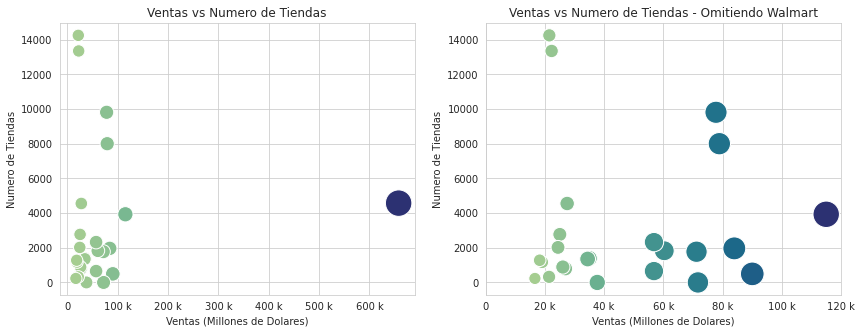

In [ ]:
fig,axes=plt.subplots(1,2, figsize=(14,5))
sns.set_style("ticks")
sns.scatterplot(data=df,x='Sales',y='Stores',ax=axes[0],hue="Sales", size="Sales",
                 sizes=(150, 700),palette='crest',legend=False)
axes[0].xaxis.set_major_formatter(ticker.EngFormatter());axes[0].set_title("Ventas vs Numero de Tiendas")
axes[0].set_xlabel("Ventas (Millones de Dolares)");axes[0].set_ylabel("Numero de Tiendas")

sns.scatterplot(data=df_without_walmart,x='Sales',y='Stores',ax=axes[1],legend=False,
                hue="Sales", size="Sales", sizes=(150, 700),palette='crest')
axes[1].set_title("Ventas vs Numero de Tiendas - Omitiendo Walmart")
axes[1].xaxis.set_major_formatter(ticker.EngFormatter());axes[1].set_xlabel("Ventas (Millones de Dolares)")
axes[1].set_ylabel("Numero de Tiendas");axes[1].set_xlim([0,120000])

fig.show()

#### Gráfica considerando todos los Retails
No existe correlación entre ambas variables. Pocas compañías sobrepasan las 8000 tiendas pero no superan los 10000 millones de dolares en ventas. 
#### Gráfica sin considerar Walmart
Gracias a la omisión de Walmart se puede evidenciar de forma mas clara que existe una mayor cantidad de Compañías que tienen mejores ventas con menos de 6000 tiendas que las tiendas que poseen mas de 8000 tiendas.

#### ¿Si una empresa tiene más tiendas tendrá más dinero de ventas?
La hipotesis planteada al inicio fue erronea y se concluye que:
> **El numero de tiendas no influye al total del ventas tiene los Retails**

### 5. ¿Cuál es el rango que existe entre las ventas?

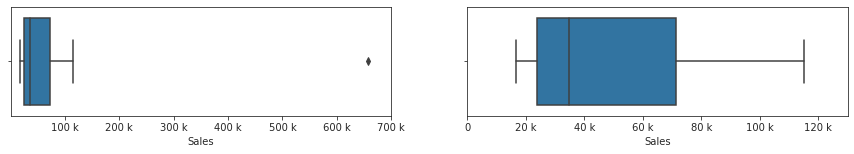

In [ ]:
fig,axes=plt.subplots(1,2, figsize=(15,2))

sns.boxplot(df['Sales'],ax=axes[0]) # Figura Izquierda
axes[0].set_xlim([100,700000]);axes[0].xaxis.set_major_formatter(ticker.EngFormatter())
sns.boxplot(df_without_walmart['Sales'],ax=axes[1]) # Figura Derecha
axes[1].set_xlim([0,130000]); axes[1].xaxis.set_major_formatter(ticker.EngFormatter())
fig.show()

Como podemos ver en el diagrama de cajas el outlier de Walmart, sesgaria nuestro analisis ya que la mayoria de ventas se encuentran en el rango de 20000 a 70000 millones de dolares por lo que se va a considerar ambas situaciones.

In [ ]:
all_max = np.max(df['Sales'])
all_min = np.min(df['Sales'])
all_range=all_max-all_min
ww_max = np.max(df_without_walmart['Sales'])
ww_min = np.min(df_without_walmart['Sales'])
ww_range=ww_max-ww_min

In [ ]:
resume={'Todos los Retails':[all_max,all_min,all_range],'Sin Walmart':[ww_max,ww_min,ww_range]}
df_resume=pd.DataFrame(resume, index=['Máximo','Mínimo','Rango'])
df_resume

,Todos los Retails,Sin Walmart
Máximo,658119,115037
Mínimo,16592,16592
Rango,641527,98445


El rango exacto de ventas seria:
- **641527** millones de dolares para todas las compañias
- **98445** millones de dolares descartando las ventas de Walmart

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

Primero se encuentran las empresas que han coincidido en ambas listas principales

In [ ]:
df1=df.sort_values("Sales",ascending=False)[0:5]
df2=df.sort_values("Stores",ascending=False)[0:5]
top_sales_stores=df1[df1['Company'].isin(df2['Company'])]
top_sales_stores.reset_index(drop=True,inplace=True)
top_sales_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


Se tiene dos Retails que coinciden en ambos análisis: Walmart US y Walgreen Boots

Para visualizar de mejor manera estos Retails se realizara un Grafico de Barras

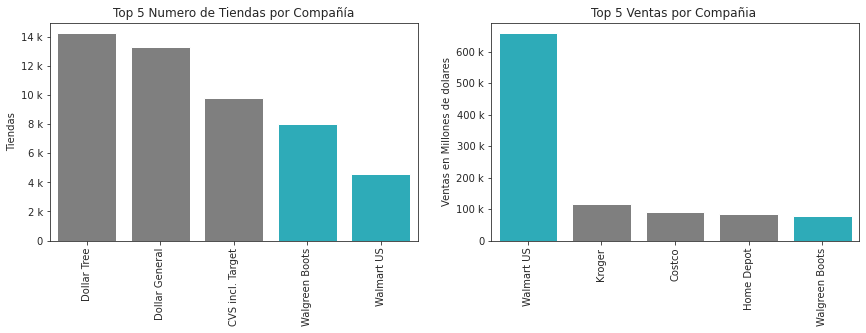

In [ ]:
fig,axes=plt.subplots(1,2, figsize=(14.5,4));
cat=list(top_sales_stores['Company'])
lab=list(df['Company'])
colors_sal_sto=make_color_palette(cat,lab,palette,palette[9])

sns.barplot(df2['Company'],df2['Stores'],ax=axes[0],palette=colors_sal_sto)
axes[0].set_ylabel("Tiendas");axes[0].set_xlabel("Compañías")
axes[0].set_title("Top 5 Numero de Tiendas por Compañía");axes[0].tick_params(axis='x', rotation=90) 
axes[0].yaxis.set_major_formatter(ticker.EngFormatter()); axes[0].set(xlabel=None)

sns.barplot(top_sales_labels[0:5],top_sales_data[0:5],ax=axes[1],palette=colors_sal_sto)
axes[1].set_ylabel("Ventas en Millones de dolares");axes[1].set_xlabel("Compañías")
axes[1].set_title("Top 5 Ventas por Compañia ");axes[1].yaxis.set_major_formatter(ticker.EngFormatter())
axes[1].tick_params(axis='x', rotation=90);axes[1].set(xlabel=None)
fig.show()

Dolar tree y Dollar General No distan mucho de su numero de Tiendas, ambas tiendas son catalogadas similares por los customers de USA. Talvez debido a su modelo de negocio con precios bajos no permiten que ninguno de los dos pueda estar en el Top de Ventas

![Picture title](./Images/image-20220224-230213.png)

#### Puntos a Considerar
- Walmart no tiene el mayor número de tiendas a pesar de tener el mayor numero de ventas
- Walgreen Boots es una cadena de farmacias minoristas, con una gran presencia en la mayoria de estados de USA


#### Conclusion

> Las dos compañías que coinciden en ambos top son **Waltmart** y **Walgreen Boots**
![Picture title](./Images/wal-wall.png)

### 7. ¿Qué categoría de compañía generó más ventas?

Hay que seccionar dos tipos de analisis ya que como se ha visto con anterioridad Walmart, causa cambios significativos especialmente cuando se consideran las ventas.

In [ ]:
df_category_sales=df.groupby('Category').sum().sort_values('Sales',ascending=False)
df_category_sales_ww=df_without_walmart.groupby('Category').sum().sort_values('Sales',ascending=False)

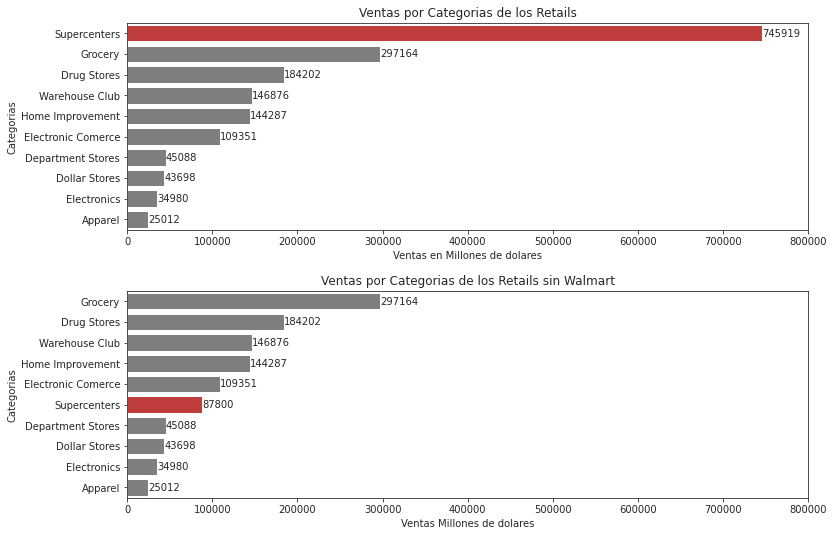

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(11,8))
fig.tight_layout(pad=4.0)
color_dic=make_color_palette(['Supercenters'],df['Category'],palette)
sns.barplot(df_category_sales['Sales'],df_category_sales.index,ax=axes[0],palette=color_dic)
axes[0].set_title("Ventas por Categorias de los Retails"); axes[0].set_xlabel('Ventas en Millones de dolares'); 
axes[0].set_ylabel('Categorias'); axes[0].bar_label(axes[0].containers[0])
axes[0].set_xlim([0,800000])

sns.barplot(df_category_sales_ww['Sales'],df_category_sales_ww.index,palette=color_dic)
axes[1].set_title("Ventas por Categorias de los Retails sin Walmart"); 
axes[1].set_xlabel('Ventas Millones de dolares') ;axes[1].set_ylabel('Categorias'); 
axes[1].bar_label(axes[1].containers[0]);axes[1].set_xlim([0,800000])
fig.show()

Walmart posee tiendas minoristas a gran escala, en una menor medida tambien cuenta con Supercentros donde ademas de la tienda de abarrotes consta de farmacias, mercadería en general como: ropa, zapatos, electrónica, muebles, etc. 

Este podría ser el motivo principal por el que Walmart tiene tantas ventas ya que con sus Supercentros ha logrado posicionarse en varias categorias permitiendo al usuario encontrar todo en un mismo lugar. 

Walmart y Walmart Supercenters operan por separado y son una entidad diferente, se requiere una mayor cantidad de datos para seccionar con detalle a este Retail.

![Picture title](./Images/image-20220224-225629.png)

#### Puntos a Considerar
- Grocery es una Tienda de Abarrotes, las empresas que mas ventas tienen en esta categoria segun ***foodIndustry.com*** son **Kroger** y **Costco**, lo cual coincide con el analisis de ventas previamente realizado.
- Supercenters, son sitios que se cuenta con mas de dos categorias de tiendas.
- Con la omisión de Walmart US la categoría de Supercenter deciende 5 puestos
- Grocery tiene una marcada diferencia con el resto de categorias de Retails a excepcion de Supercenters.

#### Conclusiones:
> - La categoria que genera más ventas es **Supercenters con 745919 millones de dólares**
> - La Segunda categoria con mas ventas es **Grocery** correspondiente a las tiendas de Abarrotes **con 297169 millones de dólares**


![Picture title](./Images/sup-gro.png)


### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [ ]:
df_sorted_by_sas=df.sort_values( 'Sales/Avg. Store', ascending=False).reset_index(drop=True)
print(df_sorted_by_sas['Company'][0])

Costco


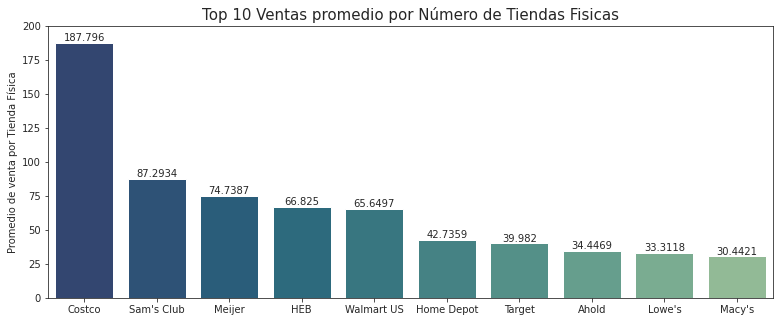

In [ ]:
lenght_sas=10
fig,axes=plt.subplots(1,figsize=(13,5))
sns.barplot(df_sorted_by_sas['Company'][0:lenght_sas],
            df_sorted_by_sas['Sales/Avg. Store'][0:lenght_sas], ax=axes,palette='crest_r')
axes.set_title(f"Top {lenght_sas} Ventas promedio por Número de Tiendas Fisicas",size=15)
axes.set_xlabel('Categorias'); axes.set_ylim([0,200]); axes.set_ylabel('Promedio de venta por Tienda Física')
axes.set(xlabel=None); axes.bar_label(axes.containers[0])
fig.show()

**Costco** es una cadena que vende una gran variedad de productos. Es la cadena más grande del mundo después de Walmart. Costo cuenta con tiendas mas alla de Estados Unidos, paises como: Mexico, Canada o Reino Unido. Costco tendria un mejor desempeño ya que este analisis unicamente indica a las ventas de los Retails en Estados Unidos.

![Picture title](./Images/costco.png)


#### Puntos a considerar
- Costco Supera ampliamente a sus competidores con una diferencia de alrededor de 100 millones de dolares
- Walmart a pesar de tener la mayor cantidad de ventas no tiene un promedio muy distinto a sus competidores

#### Conclusión
> La empresa con el mejor promedio de ventas por tienda fisica es Costco, a pesar de no ser el Retail con la mayor cantidad de tiendas Fisicas o el mejor Retail en ventas

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Se van a considerar a tiendas exclusivamente Online, a aquellas que no posean tiendas Fisicas, ya que para realizar un analisis mas detallado requeririamos de más datos

In [ ]:
df_online=df[df['Stores']==0].reset_index(drop=True)
df_online

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Amazon,71687,0.0,0.0,0.0,Electronic Comerce
1,Apple incl. Online,37664,0.0,0.0,0.0,Electronic Comerce


Los Retils que no poseen tiendas Físicas son **Amazon** y **Apple inc Online**

In [ ]:
df['Type Store']=df['Category'].apply(lambda x: 'Online' if x in list(df_online['Category']) else 'Física')

#### ¿Cuál es la Posicion de Amazon y Apple Online respecto a los otros Retails?

Hay que ver de forma rápida e intuitiva como Amazon y Apple Online estan posicionados en ventas respecto otros Retails. Para ello generaremos un grafico de barras destacando estos Retails

In [ ]:
lenght_aa=15
sales_labels_without_walmart=df_without_walmart.sort_values('Sales',ascending=False)['Company'][0:lenght_aa]
sales_data_without_walmart=df_without_walmart.sort_values('Sales',ascending=False)['Sales'][0:lenght_aa]

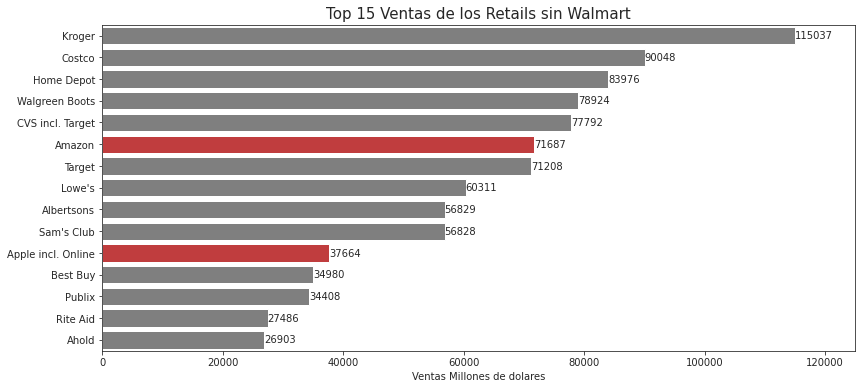

In [ ]:
fig,axes=plt.subplots(figsize=(13.5,6)); 
clr_stores=make_color_palette(list(df_online['Company']),list(df['Company']),palette)
sns.barplot(sales_data_without_walmart,sales_labels_without_walmart, palette=clr_stores)
axes.set_title(f"Top {lenght_aa} Ventas de los Retails sin Walmart",size=15)
axes.set_xlabel('Ventas Millones de dolares'); axes.set(ylabel=None); axes.set_xlim([0,125000])
axes.bar_label(axes.containers[0])
fig.show()

Tanto Amazon como Apple ofrecen más servicios(Streaming, Almacenamiento en la nube, etc) que por obvias razones no son cosideradas en este estudio. A pesar de ello se encuetran en una posicion favorable ante otros Retails que se dedican unicamente a las ventas.

![Picture title](./Images/ama-apple.png)


#### Puntos a considerar
- Se puede apreciar que Amazon es uno de los Retails que se encuentran Facilmente en el Top 10 con ventas sobre los 70000 millones de dolares
- Si bien Apple tiene tiendas fisicas, en el dataset unicamente existe información de sus ventas online, por lo cual queda fuera del top 10 de retail con ventas en alrededor de los 37000 millones de dolares
- Seria interesante contrastar las ventas de las tiendas online de Apple con las ventas de sus tiendas fisicas.

 

#### ¿Que porcentaje representan las ventas Online en las Vetas de todos los Retails?

Como se ha trabajo a lo largo de este informe, vamos a considerar dos casos fundamentales:
- Todas las Tiendas Fisicas
- Las tiendas Fisicas sin Walmart

In [ ]:
sum_by_type_store=df.groupby('Type Store')[['Sales']].sum().round(2)
sum_by_type_store_ww=df.drop(0).groupby('Type Store')[['Sales']].sum().round(2)

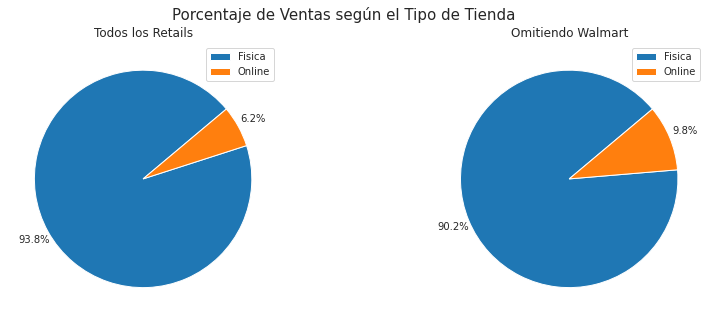

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(14,5));
leg=['Fisica','Online']
axes[0].pie(sum_by_type_store['Sales'],autopct = '%1.1f%%',pctdistance=1.15,colors=palette,startangle=40)
axes[0].legend(leg);axes[0].set_title('Todos los Retails')
axes[1].pie(sum_by_type_store_ww['Sales'],autopct = '%1.1f%%',pctdistance=1.15,colors=palette,startangle=40)
fig.suptitle('Porcentaje de Ventas según el Tipo de Tienda', size=15)
axes[1].legend(leg);axes[1].set_title('Omitiendo Walmart')
fig.show()


#### Puntos a considerar
- Es abrumadora las diferencias a pesar de eliminar Walmart
- Unicamente tenemos 2 Retails en la categoria de Online y 23 Retails con la categoria de Tiendas Fisicas

#### ¿El promedio de ventas de las Tiendas Fisicas es mejor que el de las Tiendas Online?

In [ ]:
df_mean_by_type_store=df.groupby('Type Store')[['Sales']].mean().round(2)
df_mean_by_type_store_ww=df.drop(0).groupby('Type Store')[['Sales']].mean().round(2)

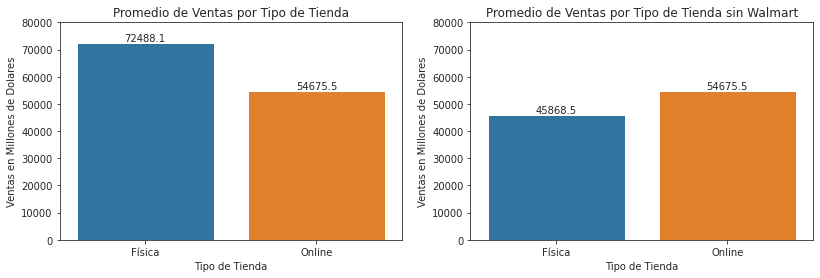

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(13.5,4)); 
sns.set_style("whitegrid")
sns.barplot(df_mean_by_type_store.index,df_mean_by_type_store['Sales'],ax=axes[0])
axes[0].set_ylim(0,80000)
axes[0].set_title('Promedio de Ventas por Tipo de Tienda');axes[0].set_ylabel('Ventas en Millones de Dolares')
axes[0].bar_label(axes[0].containers[0]); axes[0].set_xlabel('Tipo de Tienda')

sns.barplot(df_mean_by_type_store_ww.index,df_mean_by_type_store_ww['Sales'],ax=axes[1])
axes[1].set_title('Promedio de Ventas por Tipo de Tienda sin Walmart')
axes[1].bar_label(axes[1].containers[0]); axes[1].set_ylabel('Ventas en Millones de Dolares')
axes[1].set_xlabel('Tipo de Tienda');axes[1].set_ylim(0,80000)


fig.show()

#### Puntos a considerar
- A pesar de considerar Considerar a Walmart en la grafica de la izquierda, el promedio entre ambas categorias no dista de manera abrumadora.
- Omitiendo a Walmart el promedio de ventas favorece a las ventas online



#### Conclusiones
> - Son pocas las tiendas que se las puede consideran exclusivamente Online en el Dataset, esto puede generar que las comparativas frente a las tiendas fisicas sea un poco sesgado.
> - A pesar de los inconvenientes de primera mano se puede llegar a tener una impresion que las ventas Online, resultan mejor frente a las tiendas fisicas. Para ahondar en esta hipotesis seria ideal ver los ingresos brutos que generan las empresas en este analisis.

## III. Tus propias preguntas

### 10. ¿Es necesario tener muchas Tiendas para aumentar el promedio de Ventas/Tiendas?

In [ ]:
df_sorted_by_stores=df.sort_values('Stores',ascending=False).reset_index(drop=True)
df_sorted_by_sas
print(f'Retail con el mayor numero de Tiendas: {df_sorted_by_stores["Company"][0]}')
print(f'Retail con el mejor promedio de Ventas por numero de Tiendas: {df_sorted_by_sas["Company"][0]}')

Retail con el mayor numero de Tiendas: Dollar Tree
Retail con el mejor promedio de Ventas por numero de Tiendas: Costco


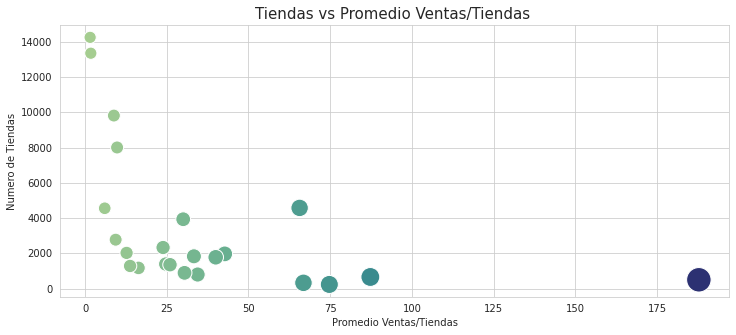

In [ ]:
fig,axes=plt.subplots(1,figsize=(12,5))
sns.set_style("ticks")
sns.scatterplot(data=df_no_online_stores,x='Sales/Avg. Store',y='Stores',ax=axes,legend=False,
                hue="Sales/Avg. Store", size="Sales/Avg. Store", sizes=(150, 600),palette='crest')
axes.xaxis.set_major_formatter(ticker.EngFormatter());
axes.set_xlabel("Promedio Ventas/Tiendas");axes.set_ylabel("Numero de Tiendas");
axes.set_title("Tiendas vs Promedio Ventas/Tiendas ",size=15)
fig.show()

> La primera impresión a interpretar por el grafico de puntos es que no es necesario tener una gran cantidad de tiendas para tener un gran promedio de Ventas/Tienda

Hay que contrastar la hipotesis previa relacionando estas dos variables en una nueva grafica.

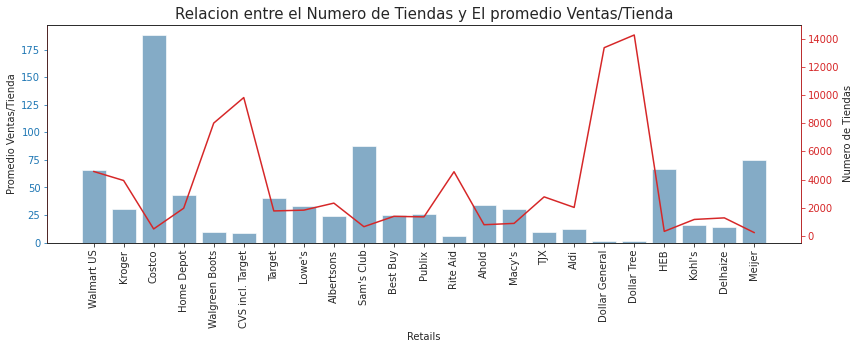

In [ ]:
fig,axes=plt.subplots(1,figsize=(13.5,4))

sns.barplot(df_no_online_stores['Company'],
            df_no_online_stores['Sales/Avg. Store'],color=palette[0],ax=axes,alpha=0.6)

axes.tick_params(axis='x', rotation=90);
axes.set_xlabel('Retails'); axes.set_ylabel('Promedio Ventas/Tienda')
axes.tick_params(axis='y', colors=palette[0])
axes.spines['left'].set_color('red')

axes2=axes.twinx()
sns.lineplot(df_no_online_stores['Company'],
            df_no_online_stores['Stores'],color=palette[3],ax=axes2)
axes.set_title(f"Relacion entre el Numero de Tiendas y El promedio Ventas/Tienda",size=15)
axes2.set_ylabel('Numero de Tiendas')
axes2.tick_params(axis='y', colors=palette[3])
axes2.spines['right'].set_color(palette[3])
fig.show()

#### Puntos a considerar
- Costco Tiene el mejor promedio de Ventas/Tiendas pero a su vez su nivel de tiendas fisicas es bajo en comparacion al resto de reatails
- Dollar General y Dolar Tree, son los retails con la mayor cantidad de Tiendas Fisicas y a su vez tienen el peor promedio de Ventas/Tiendas
- Parece que una mayor cantidad de tiendas, dificulta mejorar las ganancias de los Retails

#### Conclusion
> Tener una gran cantidad de tiendas dificulta tener un mejor promedio de Ventas/Tiendas, los Retails que tienen la menor cantidad de tiendas son las que mejor promedio poseen
> A exepcion de Walmart, Best Buy, Lowe's y Publix parece que el resto de Retails siguen esta tendencia



### 11. ¿Cual es la categoria que tiene la mayoria de compañias?

In [ ]:
df['Count']=1
count_cat_retails=df.groupby('Category')['Count'].count().sort_values(ascending=False)

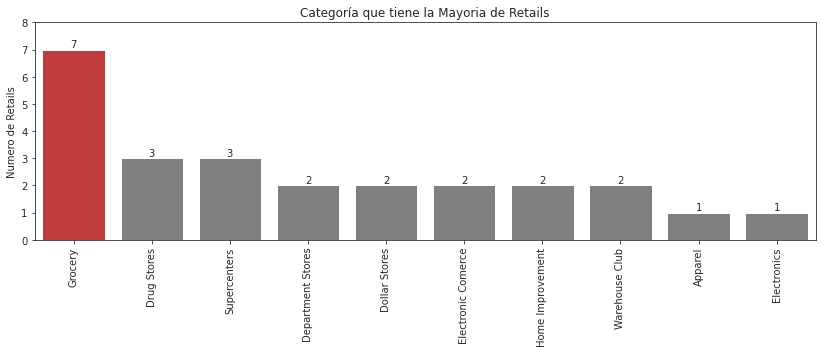

In [ ]:
colors=make_color_palette('Grocery',list(count_cat_retails.index),palette)
fig,axes=plt.subplots(1,figsize=(14,4))
sns.barplot(count_cat_retails.index,count_cat_retails.values,ax=axes,palette=colors)
axes.bar_label(axes.containers[0]); axes.set_title('Categoría que tiene la Mayoria de Retails')
axes.set_ylabel('Numero de Retails');axes.set_ylim([0,8]); 
axes.tick_params(axis='x', rotation=90); axes.set(xlabel=None);
fig.show()

#### Puntos a Considerar
- Si omitimos a Walmart; Grocery sería la categoria que mas ventas genera y la que más Retails comparten en el datset.  
- Drug Stores y Supercenters son las segunda mejores categorias con 3 Retails por cada una
#### Conclusiones
>"Grocery" ademas de ser la segunda categoria que tiene las mejores ventas, es la categoria que comparten la mayoria de Retails. Tener una cadena de Teindas de Abarrotes es muy favorable en USA.

### 12 ¿Cuál es el creciento que han tenido los Retails en 2015?

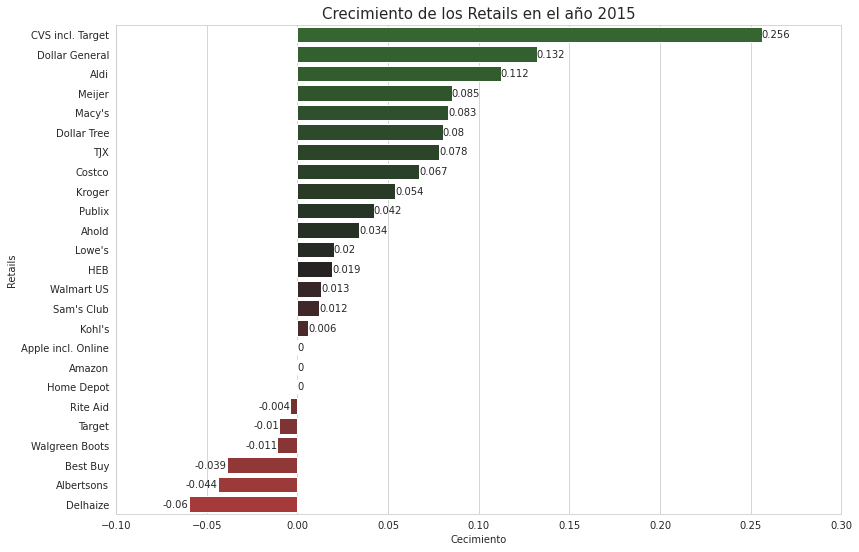

In [ ]:
df_sorted_by_scg=df.sort_values('Store Count Growth',ascending=False).reset_index(drop=True)

fig, axes=plt.subplots(figsize=(13,9))
pal=sns.diverging_palette(126, 12, s=80, l=41, sep=1,n=len(df_sorted_by_scg), center="dark")
sns.barplot(df_sorted_by_scg['Store Count Growth'].round(3),df_sorted_by_scg['Company'],ax=axes,palette=pal)
axes.bar_label(axes.containers[0])
axes.set_title('Crecimiento de los Retails en el año 2015',size=15)
axes.set_ylabel('Retails')
axes.set_xlabel('Cecimiento')
axes.set_xlim([-0.10,0.3])
fig.show()

CSV incl Target es el Retail con mayor crecimiento en este analisis, lo curioso es compararlo con Target que es un Retail que no tuvo un leve decrecimiento en 2015. Esto es debido a la compra de la cadena de farmacias de CSV Healt [Tal y como se encuentra en este articulo](https://www.cvshealth.com/newsroom/press-releases/cvs-health-and-target-sign-agreement-cvs-health-acquire-rebrand-and-operate#:~:text=Through%20this%20agreement%2C%20CVS%20Health,stores%20that%20offer%20pharmacy%20services.). Esta compra supondria para target un gran crecimiento para sus ventas en los proximos años.

Recientemente en 2020 [CSV Healt ha comprado las farmacias de Target Corp's ](https://www.theshelbyreport.com/2020/01/31/cvs-health-acquisition-targets-pharmacy-clinic-businesses/) incluyendo a la cadena de farmacias de CSV, seria ideal contrastar esta informacion con el creciemiento de los años 2016 a 2019 para saber si esta compra le favorecio a Traget o fue un fracaso en consecuencia tuvo que volver a vender la cadena de farmacias.

![image](./Images/csvinc.png)
#### Conclusiones

- CVS incl. Traget es el Retail que ha tenido el mayor crecimiento en sus tiendas con +25% 
- Delhaize es el reatail que tuvo el mayor decrecimiento en sus tiendas con un aproximado de -6% 




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5202ffba-0a3f-4c23-8c98-43f126e58560' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>